In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import suppression as s

In [4]:
gaba_fn = 'gaba_data.txt'
supp_fn = 'supp_data_individual_20170427.txt'

In [5]:
sdf = s.load_psychophys(supp_fn)
gdf = s.load_gaba(gaba_fn)

In [10]:
np.unique(sdf.Subject)

array(['ah', 'ai', 'am', 'ap', 'bi', 'bo', 'cl', 'cr', 'ct', 'dl', 'ds',
       'eg', 'ei', 'em', 'es', 'gd', 'gm', 'gw', 'jd', 'jv', 'ke', 'kw',
       'li', 'ls', 'mg', 'mk', 'ms', 'mv', 'nl', 'nn', 'rn', 'sd', 'se',
       'tj', 'tm', 'tt', 'yl'], dtype=object)

In [6]:
gdf.head()

,subjName,Population,Presentation,GABA
0,ac,Amblyope,occ_binoc,0.196
1,ac,Amblyope,occ_none,0.203
2,am,Amblyope,occ_binoc,0.193
3,am,Amblyope,occ_none,0.188
4,as,Amblyope,occ_binoc,0.217


## Identify common subjects, subset data frames to only include these ##

In [7]:
pp_subjs = np.unique(sdf.Subject)
gaba_subjs = np.unique(gdf.subjName)
use_subjs = list(np.intersect1d(pp_subjs, gaba_subjs))
print(pp_subjs, len(pp_subjs))
print(gaba_subjs, len(gaba_subjs))
print(use_subjs, len(use_subjs))

['ah' 'ai' 'am' 'ap' 'bi' 'bo' 'cl' 'cr' 'ct' 'dl' 'ds' 'eg' 'ei' 'em' 'es'
 'gd' 'gm' 'gw' 'jd' 'jv' 'ke' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'mv' 'nl' 'nn'
 'rn' 'sd' 'se' 'tj' 'tm' 'tt' 'yl'] 37
['ac' 'ai' 'am' 'as' 'bi' 'ch' 'cr' 'cs' 'ct' 'dl' 'ei' 'em' 'es' 'gd' 'gm'
 'jd' 'jm' 'jv' 'ks' 'kw' 'li' 'ls' 'mg' 'mk' 'ms' 'nl' 'ps' 'rn' 'sd' 'tt'
 'yl'] 31
['ai', 'am', 'bi', 'cr', 'ct', 'dl', 'ei', 'em', 'es', 'gd', 'gm', 'jd', 'jv', 'kw', 'li', 'ls', 'mg', 'mk', 'ms', 'nl', 'rn', 'sd', 'tt', 'yl'] 24


In [8]:
gdf = gdf[gdf.subjName.isin(use_subjs)] # only subjects who did both tasks
gdf = gdf[gdf.Presentation=='occ_binoc'] # use this GABA measure
gdf

,subjName,Population,Presentation,GABA
2,am,Amblyope,occ_binoc,0.193
6,bi,Amblyope,occ_binoc,0.207
12,em,Amblyope,occ_binoc,0.182
14,gd,Amblyope,occ_binoc,0.203
16,jv,Amblyope,occ_binoc,0.215
20,li,Amblyope,occ_binoc,0.227
22,mg,Amblyope,occ_binoc,0.210
26,rn,Amblyope,occ_binoc,0.202
28,sd,Amblyope,occ_binoc,0.190
30,tt,Amblyope,occ_binoc,0.179


In [9]:
len(gdf[gdf['Population']=='Amblyope'])

10

In [10]:
len(gdf)

24

In [11]:
sdf = sdf[sdf.Subject.isin(use_subjs)] # only subjects who did both tasks
# make sure there are only as many unique subjNames in sdf as there are entries in gdf.subjName
assert(len(np.unique(sdf.Subject))==len(gdf.subjName))

## Pick which task to analyze

In [12]:
sdf = sdf[sdf['Task']=='OS']

## Model Psychophysical data ##
### ThreshElev as a function of logRelContrast ###

In [13]:
pp_gvars = ['Task','Orientation','Presentation','Population','Subject','Eye','Trace']
pp_gvars_base = pp_gvars + ['BaselineThresh']

In [14]:
print(pp_gvars, '\n', pp_gvars_base)

['Task', 'Orientation', 'Presentation', 'Population', 'Subject', 'Eye', 'Trace'] 
 ['Task', 'Orientation', 'Presentation', 'Population', 'Subject', 'Eye', 'Trace', 'BaselineThresh']


In [15]:
# create groups based on these grouping variables
groups = sdf.groupby(pp_gvars)
print(len(groups))
for g in groups:
    print(g)

180
(('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De'),      Subject Task Presentation Orientation Eye Population  MaskContrast  \
1887      am   OS       nDicho       Cross  De   Amblyope          11.0   
1888      am   OS       nDicho       Cross  De   Amblyope          16.0   
1889      am   OS       nDicho       Cross  De   Amblyope          23.0   
1890      am   OS       nDicho       Cross  De   Amblyope          32.0   
1891      am   OS       nDicho       Cross  De   Amblyope          45.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast        Trace  BaselineThresh  \
1887       1.011          0.010            4.120  Amblyope-De           2.184   
1888       1.139          0.006            5.992  Amblyope-De           2.184   
1889       0.749          0.013            8.614  Amblyope-De           2.184   
1890       1.302          0.007           11.984  Amblyope-De           2.184   
1891       1.128          0.006           16.853  Amblyope-De           2

1720                    21.801          5       0.411451  )
(('OS', 'Cross', 'nDicho', 'Control', 'es', 'De', 'Control-De'),      Subject Task Presentation Orientation Eye Population  MaskContrast  \
1845      es   OS       nDicho       Cross  De    Control           7.0   
1846      es   OS       nDicho       Cross  De    Control          11.0   
1847      es   OS       nDicho       Cross  De    Control          18.0   
1848      es   OS       nDicho       Cross  De    Control          28.0   
1849      es   OS       nDicho       Cross  De    Control          45.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast       Trace  BaselineThresh  \
1845       1.115          0.009            2.469  Control-De           3.433   
1846       1.327          0.008            3.880  Control-De           3.433   
1847       1.038          0.009            6.349  Control-De           3.433   
1848       1.018          0.011            9.876  Control-De           3.433   
1849       1.504        

1337           2.007                    23.690          6       0.115943  )
(('OS', 'Cross', 'nMono', 'Amblyope', 'rn', 'De', 'Amblyope-De'),      Subject Task Presentation Orientation Eye Population  MaskContrast  \
1443      rn   OS        nMono       Cross  De   Amblyope           5.0   
1444      rn   OS        nMono       Cross  De   Amblyope          10.0   
1445      rn   OS        nMono       Cross  De   Amblyope          30.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast        Trace  BaselineThresh  \
1443       0.935          0.012            2.874  Amblyope-De            1.74   
1444       1.046          0.009            5.748  Amblyope-De            1.74   
1445       1.446          0.007           17.243  Amblyope-De            1.74   

      BinCenterRelMaskContrast  BinNumber  logThreshElev  
1443                     3.074          1      -0.029188  
1444                     5.206          2       0.019532  
1445                    13.918          4       0.16016

1549            2.67                    13.918          4       1.256020  )
(('OS', 'Iso', 'nDicho', 'Amblyope', 'bi', 'De', 'Amblyope-De'),      Subject Task Presentation Orientation Eye Population  MaskContrast  \
1649      bi   OS       nDicho         Iso  De   Amblyope           5.0   
1650      bi   OS       nDicho         Iso  De   Amblyope          10.0   
1651      bi   OS       nDicho         Iso  De   Amblyope          30.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast        Trace  BaselineThresh  \
1649       1.401          0.009            1.848  Amblyope-De           1.668   
1650       2.833          0.031            3.696  Amblyope-De           1.668   
1651      16.088          0.017           11.087  Amblyope-De           1.668   

      BinCenterRelMaskContrast  BinNumber  logThreshElev  
1649                     1.803          1       0.146438  
1650                     2.834          2       0.452247  
1651                    13.555          5       1.206502

1623                    14.301          4       1.152655  )
(('OS', 'Iso', 'nDicho', 'Control', 'mk', 'Nde', 'Control-Nde'),      Subject Task Presentation Orientation  Eye Population  MaskContrast  \
1514      mk   OS       nDicho         Iso  Nde    Control          10.0   
1515      mk   OS       nDicho         Iso  Nde    Control          30.0   
1516      mk   OS       nDicho         Iso  Nde    Control          39.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast        Trace  BaselineThresh  \
1514       5.962          0.015            3.643  Control-Nde           2.846   
1515      10.317          0.008           10.930  Control-Nde           2.846   
1516      12.147          0.010           14.209  Control-Nde           2.846   

      BinCenterRelMaskContrast  BinNumber  logThreshElev  
1514                     3.307          1       0.775392  
1515                    13.429          4       1.013553  
1516                    13.429          4       1.084469  )
(('OS', 

(('OS', 'Iso', 'nMono', 'Control', 'ei', 'De', 'Control-De'),      Subject Task Presentation Orientation Eye Population  MaskContrast  \
1120      ei   OS        nMono         Iso  De    Control          10.0   
1121      ei   OS        nMono         Iso  De    Control          30.0   
1122      ei   OS        nMono         Iso  De    Control          39.0   

      ThreshElev  ThreshElev_SE  RelMaskContrast       Trace  BaselineThresh  \
1120       1.637          0.052            6.126  Control-De           1.632   
1121       1.438          0.039           18.379  Control-De           1.632   
1122       2.759          0.010           23.892  Control-De           1.632   

      BinCenterRelMaskContrast  BinNumber  logThreshElev  
1120                     4.898          2       0.214049  
1121                    22.106          5       0.157759  
1122                    22.106          5       0.440752  )
(('OS', 'Iso', 'nMono', 'Control', 'ei', 'Nde', 'Control-Nde'),      Subject Ta

### Do t-tests between corresponding points (to find where the lines are most different)

In [16]:
tt_df = sdf

In [17]:
tt_df.head()

,Subject,Task,Presentation,Orientation,Eye,Population,MaskContrast,ThreshElev,ThreshElev_SE,RelMaskContrast,Trace,BaselineThresh,BinCenterRelMaskContrast,BinNumber,logThreshElev
970,ai,OS,nMono,Iso,Nde,Control,10.0,0.942,0.087,3.090,Control-Nde,3.236,3.069,1,-0.025949
971,ai,OS,nMono,Iso,Nde,Control,30.0,2.527,0.010,9.271,Control-Nde,3.236,8.200,3,0.402605
972,ai,OS,nMono,Iso,Nde,Control,39.0,2.552,0.025,12.052,Control-Nde,3.236,13.711,4,0.406881
983,cr,OS,nMono,Iso,Nde,Control,10.0,1.330,0.016,6.869,Control-Nde,1.456,8.200,3,0.123852
984,cr,OS,nMono,Iso,Nde,Control,30.0,2.911,0.013,20.608,Control-Nde,1.456,21.361,5,0.464042


In [18]:
gvars_ttest = ['Task','Orientation','Presentation','Population']
gvars_pair = gvars_ttest + ['BinNumber']

tt_grouped = tt_df.groupby(gvars_ttest)
print(len(tt_grouped))

for gv, g in tt_grouped:
    print(gv)

8
('OS', 'Cross', 'nDicho', 'Amblyope')
('OS', 'Cross', 'nDicho', 'Control')
('OS', 'Cross', 'nMono', 'Amblyope')
('OS', 'Cross', 'nMono', 'Control')
('OS', 'Iso', 'nDicho', 'Amblyope')
('OS', 'Iso', 'nDicho', 'Control')
('OS', 'Iso', 'nMono', 'Amblyope')
('OS', 'Iso', 'nMono', 'Control')


In [19]:
def tt(ttg_allbin):
    '''Accepts data grouped by Task, Orientation, Presentation, Population, then analyzes each bin within this.'''
    g_bin = ttg_allbin.groupby(gvars_pair).apply(tt_onebin).reset_index()
    minp_bin = g_bin.BinNumber.iat[g_bin.pvalue.idxmin()]
    print('Bin ', minp_bin, 'has lowest p-value.\n')
    return pd.Series(minp_bin, ['BinNumberToPred'])

def tt_onebin(ttg):
    '''Accepts data grouped by Task, Orientation, Presentation, Population, BinNumber, and does a t-test on the values in the bin.'''
    nde = ttg[ttg['Eye']=='Nde']['ThreshElev'].values
    de = ttg[ttg['Eye']=='De']['ThreshElev'].values
    print(ttg.name, ttg.BinCenterRelMaskContrast.iat[0], nde, de, sep='\n')
    if (len(nde) >0 and len(de) >0):
        tt_res = st.ttest_ind(nde, de)
        if tt_res:
            return pd.Series(tt_res[1], ['pvalue'])
    else:
        print('A group with no obs, skipping')

tt_results = tt_grouped.apply(tt).reset_index()

('OS', 'Cross', 'nDicho', 'Amblyope', 1)
3.074
[ 2.178  1.988  2.053  1.393  2.512]
[ 1.024  0.796  1.337  1.178  1.131  1.128  1.094]
('OS', 'Cross', 'nDicho', 'Amblyope', 1)
3.074
[ 2.178  1.988  2.053  1.393  2.512]
[ 1.024  0.796  1.337  1.178  1.131  1.128  1.094]
('OS', 'Cross', 'nDicho', 'Amblyope', 2)
5.086
[  1.579  17.232   2.651   5.899   4.181   2.185   1.778   2.813]
[ 0.906  1.504  1.172]
('OS', 'Cross', 'nDicho', 'Amblyope', 3)
7.912
[ 0.871  1.111  4.109  2.474  4.214  2.412  2.99 ]
[ 1.011  1.139  1.063  0.967  0.87   1.127  1.35   1.527  1.134]
('OS', 'Cross', 'nDicho', 'Amblyope', 4)
13.837
[ 1.056  4.834  5.084  4.707  2.65   4.535]
[ 0.749  1.252  0.951  1.09 ]
('OS', 'Cross', 'nDicho', 'Amblyope', 5)
21.725
[  1.66   18.287  10.397   3.848   7.165   2.775   5.606]
[ 1.302  1.128  1.182  1.691  1.416  1.238  1.586  0.978]
('OS', 'Cross', 'nDicho', 'Amblyope', 6)
32.836
[ 3.189  8.849]
[ 2.341  1.413  1.377]
('OS', 'Cross', 'nDicho', 'Amblyope', 7)
33.701
[]
[ 1.545

//anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
//anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
tt_results

,Task,Orientation,Presentation,Population,BinNumberToPred
0,OS,Cross,nDicho,Amblyope,1
1,OS,Cross,nDicho,Control,3
2,OS,Cross,nMono,Amblyope,5
3,OS,Cross,nMono,Control,2
4,OS,Iso,nDicho,Amblyope,3
5,OS,Iso,nDicho,Control,2
6,OS,Iso,nMono,Amblyope,5
7,OS,Iso,nMono,Control,2


In [21]:
sdf = pd.merge(sdf, tt_results, on=gvars_ttest)

In [22]:
sdf.head()

,Subject,Task,Presentation,Orientation,Eye,Population,MaskContrast,ThreshElev,ThreshElev_SE,RelMaskContrast,Trace,BaselineThresh,BinCenterRelMaskContrast,BinNumber,logThreshElev,BinNumberToPred
0,ai,OS,nMono,Iso,Nde,Control,10.0,0.942,0.087,3.090,Control-Nde,3.236,3.069,1,-0.025949,2
1,ai,OS,nMono,Iso,Nde,Control,30.0,2.527,0.010,9.271,Control-Nde,3.236,8.200,3,0.402605,2
2,ai,OS,nMono,Iso,Nde,Control,39.0,2.552,0.025,12.052,Control-Nde,3.236,13.711,4,0.406881,2
3,cr,OS,nMono,Iso,Nde,Control,10.0,1.330,0.016,6.869,Control-Nde,1.456,8.200,3,0.123852,2
4,cr,OS,nMono,Iso,Nde,Control,30.0,2.911,0.013,20.608,Control-Nde,1.456,21.361,5,0.464042,2


In [23]:
# make sure all conditions have the same bin number to predict within them
condition_groups = sdf.groupby(gvars_ttest + ['Eye'])
assert(np.all(condition_groups.apply(
        lambda g: np.all(g.BinNumberToPred==g.BinNumberToPred.iat[0])
    ).reset_index()))

In [24]:
gvars_ttest

['Task', 'Orientation', 'Presentation', 'Population']

In [25]:
# add col with numeric value at which we want model to be evaluated
# this is determined per condition so reuse var
def add_pred_col(g):
    assert(np.all(g.BinNumberToPred==g.BinNumberToPred.iat[0]))
    RelMCToPredGroup = g[g.BinNumber==g.BinNumberToPred.iat[0]]
    assert(np.all(RelMCToPredGroup.BinCenterRelMaskContrast==RelMCToPredGroup.BinCenterRelMaskContrast.iat[0]))
    RelMCToPred = RelMCToPredGroup.BinCenterRelMaskContrast.iat[0]
    print(RelMCToPred, len(g))
    g['RelMCToPred'] = RelMCToPred
    return g
    
df_to_model = condition_groups.apply(add_pred_col)

1.803 35
1.803 35
3.074 35
8.766 45
8.031 48
20.837 35
13.189 35
4.898 45
4.932 48
4.942 34
7.932 32
4.946 45
4.91 47
21.351 34
13.555 34
4.898 45
4.953 48


In [26]:
df_to_model.head()

,Subject,Task,Presentation,Orientation,Eye,Population,MaskContrast,ThreshElev,ThreshElev_SE,RelMaskContrast,Trace,BaselineThresh,BinCenterRelMaskContrast,BinNumber,logThreshElev,BinNumberToPred,RelMCToPred
0,ai,OS,nMono,Iso,Nde,Control,10.0,0.942,0.087,3.090,Control-Nde,3.236,3.069,1,-0.025949,2,4.953
1,ai,OS,nMono,Iso,Nde,Control,30.0,2.527,0.010,9.271,Control-Nde,3.236,8.200,3,0.402605,2,4.953
2,ai,OS,nMono,Iso,Nde,Control,39.0,2.552,0.025,12.052,Control-Nde,3.236,13.711,4,0.406881,2,4.953
3,cr,OS,nMono,Iso,Nde,Control,10.0,1.330,0.016,6.869,Control-Nde,1.456,8.200,3,0.123852,2,4.953
4,cr,OS,nMono,Iso,Nde,Control,30.0,2.911,0.013,20.608,Control-Nde,1.456,21.361,5,0.464042,2,4.953


In [27]:
len(np.unique(df_to_model.Subject))
len(np.unique((df_to_model[df_to_model['Population']=='Amblyope'])['Subject']))

9

### Linear model (defined in suppression.py, uses lmfit)###

In [28]:
# initialize parameters
lm_params = s.lf.Parameters()
lm_params.add('y_int', value=1)
lm_params.add('slope', value=1)
lm_params.keys()

odict_keys(['y_int', 'slope'])

### Model all data points, incl. facilitation (good for display)

In [29]:
groups = df_to_model.groupby(pp_gvars)
# model each group's data using functions defined in suppression.py
preds_wfac = groups.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh, lm_params,
                     ret='preds', supp_only=False, log=False)

('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De') 1.803
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01333     -inf      inf  0.02213     True     None     None
y_int     0.939     -inf      inf   0.2331     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De') 1.803
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01333     -inf      inf  0.02213     True     None     None
y_int     0.939     -inf      inf   0.2331     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'Nde', 'Amblyope-Nde') 3.074
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01771     -inf      inf  0.03058     True     None     None
y_int     1.049     -inf      inf   0.3938     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'bi', 'De', 'Amblyope-De') 1.803
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope 

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02394     -inf      inf  0.01676     True     None     None
y_int    0.8895     -inf      inf   0.1686     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'dl', 'De', 'Control-De') 4.898
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02768     -inf      inf 0.009086     True     None     None
y_int     1.135     -inf      inf   0.2341     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'dl', 'Nde', 'Control-Nde') 4.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03575     -inf      inf 0.003782     True     None     None
y_int     0.653     -inf      inf  0.08869     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'ei', 'De', 'Control-De') 4.898
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope  0.008911     -inf      inf 0.001204     True     None     None
y_int    0.9726 

slope  0.005947     -inf      inf  0.01632     True     None     None
y_int     1.022     -inf      inf  0.03011     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'sd', 'Nde', 'Amblyope-Nde') 7.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope      0.18     -inf      inf  0.03257     True     None     None
y_int     6.508     -inf      inf   0.2632     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'tt', 'De', 'Amblyope-De') 4.942
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03553     -inf      inf  0.01058     True     None     None
y_int     1.438     -inf      inf   0.1473     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'tt', 'Nde', 'Amblyope-Nde') 7.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     1.656     -inf      inf    0.362     True     None     None
y_int     3.177     -inf      inf    4.524     True     None     None
('OS', 'Iso',

('OS', 'Iso', 'nMono', 'Amblyope', 'bi', 'De', 'Amblyope-De') 21.351
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.06165     -inf      inf  0.05395     True     None     None
y_int     1.271     -inf      inf   0.5978     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'bi', 'Nde', 'Amblyope-Nde') 13.555
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.2046     -inf      inf  0.01343     True     None     None
y_int    0.2333     -inf      inf  0.09175     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'gd', 'De', 'Amblyope-De') 21.351
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1073     -inf      inf  0.01861     True     None     None
y_int    0.3174     -inf      inf   0.2614     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'gd', 'Nde', 'Amblyope-Nde') 13.555
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.08

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1268     -inf      inf 0.007451     True     None     None
y_int    0.5419     -inf      inf   0.1178     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'yl', 'Nde', 'Control-Nde') 4.953
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1723     -inf      inf  0.03553     True     None     None
y_int    0.1806     -inf      inf   0.6778     True     None     None


In [30]:
s.group_facet_plots(preds_wfac, s.fit_plot, 'plots/individual_linear_wfac_logaxes.pdf',
                  ['Subject','Task'], #each combo of this gets its own page
                  row='Orientation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Presentation",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshElev") 

Plotting ai.OS
Plotting am.OS
Plotting bi.OS
Plotting cr.OS
Plotting ct.OS
Plotting dl.OS
Plotting ei.OS
Plotting es.OS
Plotting gd.OS
Plotting gm.OS
Plotting jd.OS
Plotting jv.OS
Plotting kw.OS
Plotting li.OS
Plotting ls.OS
Plotting mg.OS
Plotting mk.OS
Plotting ms.OS
Plotting nl.OS
Plotting rn.OS
Plotting sd.OS
Plotting tt.OS
Plotting yl.OS
Plots saved at plots/individual_linear_wfac_logaxes.pdf


In [31]:
s.group_facet_plots(preds_wfac, s.fit_plot, 'plots/individual_linear_wfac_logaxes_withpred.pdf',
                  ['Subject','Task'], #each combo of this gets its own page
                  row='Orientation',col='Presentation',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Trace",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshPred")

Plotting ai.OS
Plotting am.OS
Plotting bi.OS
Plotting cr.OS
Plotting ct.OS
Plotting dl.OS
Plotting ei.OS
Plotting es.OS
Plotting gd.OS
Plotting gm.OS
Plotting jd.OS
Plotting jv.OS
Plotting kw.OS
Plotting li.OS
Plotting ls.OS
Plotting mg.OS
Plotting mk.OS
Plotting ms.OS
Plotting nl.OS
Plotting rn.OS
Plotting sd.OS
Plotting tt.OS
Plotting yl.OS
Plots saved at plots/individual_linear_wfac_logaxes_withpred.pdf


#### draw a single person's plot beautifully and in the right colors for the poster

In [32]:
ind_df = preds_wfac[(preds_wfac['Subject']=='gd') & (preds_wfac['Presentation']=='nDicho') & (preds_wfac['Orientation']=='Iso')]

In [33]:
ind_df

,Subject,Task,Presentation,Orientation,Eye,Population,MaskContrast,ThreshElev,ThreshElev_SE,RelMaskContrast,Trace,BaselineThresh,BinCenterRelMaskContrast,BinNumber,logThreshElev,BinNumberToPred,RelMCToPred,ThreshPred
423,gd,OS,nDicho,Iso,Nde,Amblyope,10.0,3.843,0.008,4.075,Amblyope-Nde,2.444,3.074,1,0.584670,3,7.932,3.126989
424,gd,OS,nDicho,Iso,Nde,Amblyope,15.0,5.161,0.024,6.112,Amblyope-Nde,2.444,5.076,2,0.712734,3,7.932,5.557311
425,gd,OS,nDicho,Iso,Nde,Amblyope,24.0,10.128,0.006,9.779,Amblyope-Nde,2.444,7.932,3,1.005524,3,7.932,9.932367
426,gd,OS,nDicho,Iso,Nde,Amblyope,38.0,15.601,0.008,15.483,Amblyope-Nde,2.444,13.918,4,1.193152,3,7.932,16.737744
427,gd,OS,nDicho,Iso,Nde,Amblyope,60.0,28.054,0.007,24.447,Amblyope-Nde,2.444,20.610,5,1.447995,3,7.932,27.432590
456,gd,OS,nDicho,Iso,De,Amblyope,10.0,3.072,0.020,4.091,Amblyope-De,2.454,4.942,3,0.487421,3,4.942,0.163296
457,gd,OS,nDicho,Iso,De,Amblyope,15.0,2.571,0.054,6.137,Amblyope-De,2.454,4.942,3,0.410102,3,4.942,2.845370
458,gd,OS,nDicho,Iso,De,Amblyope,24.0,4.372,0.035,9.819,Amblyope-De,2.454,8.549,4,0.640680,3,4.942,7.672053
459,gd,OS,nDicho,Iso,De,Amblyope,38.0,14.530,0.011,15.546,Amblyope-De,2.454,13.555,5,1.162266,3,4.942,15.179498
460,gd,OS,nDicho,Iso,De,Amblyope,60.0,28.294,0.012,24.547,Amblyope-De,2.454,23.690,6,1.451694,3,4.942,26.978785


In [38]:
import matplotlib.ticker as tick
def plot_ind(data):
    nde = data[data['Eye']=='Nde']
    de = data[data['Eye']=='De']
    colors = ["#5f9e6e", "#8172B2"]
    
    fig, ax = plt.subplots()
    ax.set_axis_bgcolor('white')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(np.min(data.RelMaskContrast)-.1, np.max(data.RelMaskContrast)+1)
    #ax.set_ylim(.6,8)
    ax.get_xaxis().set_major_locator(tick.LogLocator(subs=[1,2,3,4,5,6,7,8,9]))
    ax.get_yaxis().set_major_locator(tick.LogLocator(subs=[1,2,3,4,5,6,7,8,9]))
    for i, eye_df in enumerate((nde, de)):
        ax.errorbar(data=eye_df, x='RelMaskContrast', y='ThreshElev', yerr=eye_df['ThreshElev_SE'].values, fmt='o', color=colors[i])
        ax.errorbar(data=eye_df, x='RelMaskContrast', y='ThreshPred', fmt='--', color=colors[i])
    ax.axhline(y=1, ls='dotted', color='gray')
    return fig

#graphs!
with s.PdfPages('plots/individual_data_plot.pdf') as pdf:
    fig = plot_ind(ind_df)
    pdf.savefig(fig)
    plt.close('all')

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


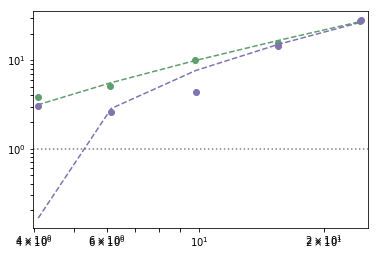

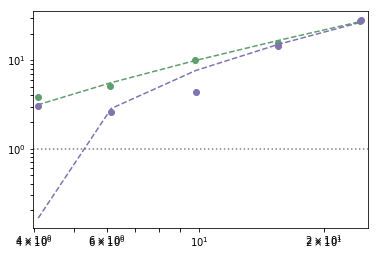

In [39]:
plot_ind(ind_df)

In [40]:
s.group_facet_plots(preds_wfac, s.fit_plot, 'plots/combined_linear_wfac_logaxes_withpred.pdf',
                  ['Task','Orientation','Presentation'], #each combo of this gets its own page
                  row='Population',col='Eye',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Subject",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshPred") 

Plotting OS.Cross.nDicho
Plotting OS.Cross.nMono
Plotting OS.Iso.nDicho
Plotting OS.Iso.nMono
Plots saved at plots/combined_linear_wfac_logaxes_withpred.pdf


### Now model only the non-facilitation points

In [ ]:
# model each group's data using functions defined in suppression.py
preds = groups.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh, lm_params,
                     ret='preds', supp_only=True, log=False)

In [ ]:
preds[preds['Subject']=='bi']

In [ ]:
s.group_facet_plots(preds, s.fit_plot, 'plots/individual_linear_logaxes.pdf',
                  ['Subject','Task'], #each combo of this gets its own page
                  row='Orientation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Presentation",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshElev") 

In [ ]:
s.group_facet_plots(preds, s.fit_plot, 'plots/individual_linear_logaxes_withpred.pdf',
                  ['Subject','Task'], #each combo of this gets its own page
                  row='Orientation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Presentation",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshPred") 

In [ ]:
s.group_facet_plots(preds, s.fit_plot, 'plots/combined_linear_logaxes_nopred.pdf',
                  ['Task','Orientation'], #each combo of this gets its own page
                  row='Presentation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Subject",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshElev") 

In [ ]:
s.group_facet_plots(preds, s.fit_plot, 'plots/combined_linear_logaxes_withpred.pdf',
                  ['Task','Orientation'], #each combo of this gets its own page
                  row='Presentation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="ThreshElev", # x, y
                  hue="Subject",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='x--',Ycol="ThreshPred") 

### Model the data again, but this time return parameters, not predictions ###

In [41]:
# suppression only (no facilitation data points)
# model each group's data using functions defined in suppression.py, return params
#groups_with_baseline = sdf.groupby(pp_gvars_base)
#pfit = groups_with_baseline.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh, lm_params, ret='weights', supp_only=True).reset_index()

In [42]:
pp_gvars_base

['Task',
 'Orientation',
 'Presentation',
 'Population',
 'Subject',
 'Eye',
 'Trace',
 'BaselineThresh']

In [43]:
# include facilitation data points
# model each group's data using functions defined in suppression.py, return params
groups_with_baseline = df_to_model.groupby(pp_gvars_base)
pfit = groups_with_baseline.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh,
                                  lm_params, ret='weights', predtype='linear', 
                                  supp_only=False).reset_index()

('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De', 2.1840000000000002) 1.803
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01333     -inf      inf  0.02213     True     None     None
y_int     0.939     -inf      inf   0.2331     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'De', 'Amblyope-De', 2.1840000000000002) 1.803
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01333     -inf      inf  0.02213     True     None     None
y_int     0.939     -inf      inf   0.2331     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'am', 'Nde', 'Amblyope-Nde', 2.6699999999999999) 3.074
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.01771     -inf      inf  0.03058     True     None     None
y_int     1.049     -inf      inf   0.3938     True     None     None
('OS', 'Cross', 'nDicho', 'Amblyope', 'bi', 'De', 'Amblyope-De', 1.6680000000000001) 1.80

('OS', 'Cross', 'nDicho', 'Control', 'jd', 'De', 'Control-De', 2.819) 8.766
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02891     -inf      inf 0.009449     True     None     None
y_int     1.067     -inf      inf    0.122     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'jd', 'Nde', 'Control-Nde', 3.1120000000000001) 8.031
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     0.135     -inf      inf 0.0008327     True     None     None
y_int    0.9016     -inf      inf  0.01187     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'kw', 'De', 'Control-De', 1.7969999999999999) 8.766
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1372     -inf      inf  0.01763     True     None     None
y_int     1.016     -inf      inf   0.2583     True     None     None
('OS', 'Cross', 'nDicho', 'Control', 'kw', 'Nde', 'Control-Nde', 1.9790000000000001) 8.031
Name      Value 

slope   0.02768     -inf      inf 0.006279     True     None     None
y_int     0.944     -inf      inf  0.06508     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'ct', 'Nde', 'Control-Nde', 3.395) 4.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02394     -inf      inf  0.01676     True     None     None
y_int    0.8895     -inf      inf   0.1686     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'dl', 'De', 'Control-De', 1.5740000000000001) 4.898
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.02768     -inf      inf 0.009086     True     None     None
y_int     1.135     -inf      inf   0.2341     True     None     None
('OS', 'Cross', 'nMono', 'Control', 'dl', 'Nde', 'Control-Nde', 1.7290000000000001) 4.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03575     -inf      inf 0.003782     True     None     None
y_int     0.653     -inf      inf  0.08

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope     1.038     -inf      inf   0.1554     True     None     None
y_int   -0.5153     -inf      inf   0.6409     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'rn', 'Nde', 'Amblyope-Nde', 4.4809999999999999) 7.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.6947     -inf      inf   0.1084     True     None     None
y_int    0.3322     -inf      inf    1.152     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'sd', 'De', 'Amblyope-De', 1.6369999999999998) 4.942
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope  0.005947     -inf      inf  0.01632     True     None     None
y_int     1.022     -inf      inf  0.03011     True     None     None
('OS', 'Iso', 'nDicho', 'Amblyope', 'sd', 'Nde', 'Amblyope-Nde', 7.1710000000000003) 7.932
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope      0.18     -

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.2148     -inf      inf    0.105     True     None     None
y_int   -0.3649     -inf      inf    1.338     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'yl', 'De', 'Control-De', 2.1600000000000001) 4.946
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.4673     -inf      inf   0.1002     True     None     None
y_int    -2.406     -inf      inf    1.911     True     None     None
('OS', 'Iso', 'nDicho', 'Control', 'yl', 'Nde', 'Control-Nde', 1.79) 4.91
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.8146     -inf      inf   0.1653     True     None     None
y_int    -3.735     -inf      inf    2.614     True     None     None
('OS', 'Iso', 'nMono', 'Amblyope', 'am', 'De', 'Amblyope-De', 2.1840000000000002) 21.351
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1722     -inf      inf  0.04491

('OS', 'Iso', 'nMono', 'Control', 'mk', 'De', 'Control-De', 2.7450000000000001) 4.898
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope       0.1     -inf      inf   0.1734     True     None     None
y_int      1.88     -inf      inf    1.831     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'mk', 'Nde', 'Control-Nde', 2.8460000000000001) 4.953
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope    0.1512     -inf      inf   0.1011     True     None     None
y_int     1.572     -inf      inf     1.03     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'ms', 'De', 'Control-De', 2.0409999999999999) 4.898
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
slope   0.03458     -inf      inf   0.0168     True     None     None
y_int     1.147     -inf      inf   0.3307     True     None     None
('OS', 'Iso', 'nMono', 'Control', 'ms', 'Nde', 'Control-Nde', 1.8480000000000001) 4.953
Name      Value 

In [44]:
pfit.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,BaselineThresh,y_int,slope,ThreshPredCritical,ThreshPredCriticalUnnorm
0,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,2.184,0.939042,0.013325,0.963067,2.103339
1,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,2.670,1.049378,0.017715,1.103833,2.947235
2,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,1.668,0.910471,0.022884,0.951731,1.587488
3,OS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,2.706,5.436084,0.792939,7.873580,21.305907
4,OS,Cross,nDicho,Amblyope,gd,De,Amblyope-De,2.454,0.650107,0.067567,0.771930,1.894316


In [45]:
pp_gvars, pp_gvars_base

(['Task',
  'Orientation',
  'Presentation',
  'Population',
  'Subject',
  'Eye',
  'Trace'],
 ['Task',
  'Orientation',
  'Presentation',
  'Population',
  'Subject',
  'Eye',
  'Trace',
  'BaselineThresh'])

In [46]:
# melt the result of the modeling into long format for plotting
m = pd.melt(pfit, id_vars=pp_gvars, var_name='measure')
m.head()

,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value
0,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,2.184
1,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,2.670
2,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,1.668
3,OS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,BaselineThresh,2.706
4,OS,Cross,nDicho,Amblyope,gd,De,Amblyope-De,BaselineThresh,2.454


In [47]:
#Grab the GABA measure for each subject and it to each observation for easy plotting
comb = m.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])
print(len(comb))
comb = comb[(comb['measure'] == 'BaselineThresh') | (comb['measure']=='ThreshPredCritical') | (comb['measure'] == 'ThreshPredCriticalUnnorm')]
print(len(comb))
comb.head()

900
540


,Task,Orientation,Presentation,Population,Subject,Eye,Trace,measure,value,GABA
0,OS,Cross,nDicho,Amblyope,am,De,Amblyope-De,BaselineThresh,2.184,0.193
1,OS,Cross,nDicho,Amblyope,am,Nde,Amblyope-Nde,BaselineThresh,2.670,0.193
2,OS,Cross,nDicho,Amblyope,bi,De,Amblyope-De,BaselineThresh,1.668,0.207
3,OS,Cross,nDicho,Amblyope,bi,Nde,Amblyope-Nde,BaselineThresh,2.706,0.207
4,OS,Cross,nDicho,Amblyope,gd,De,Amblyope-De,BaselineThresh,2.454,0.203


In [48]:
#graphs!
with s.PdfPages('plots/gaba_vs_measures_wfac_linear_measure.pdf') as pdf:
    plot_groups = comb.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv, np.all(np.isnan(gr['value'])))
        #if gv[0]=='SS' and gv[1]=='Cross': continue
        xvar = "GABA"
        x_lbl = "GABA (relative to creatine)"
        yvar = "value"
        y_lbl = {'BaselineThresh':'Baseline Threshold (C%)',
                'ThreshPredCritical':'Threshold Elevation (relative to baseline)',
                'ThreshPredCriticalUnnorm':'Predicted Threshold (C%)'}
        g = sns.lmplot(data=gr, 
                  row='Presentation',col='Population',# facet rows and columns
                  x=xvar, y=yvar,hue="Eye",sharey=False, markers=["o","x"])
        g.fig.suptitle(gv, fontsize=16, y=0.97)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(x_lbl, y_lbl[gv[2]])
        pdf.savefig(g.fig)
        plt.close(g.fig)
        
        g = sns.lmplot(data=gr, 
                  row='Presentation',col='measure',# facet rows and columns
                  x=xvar, y=yvar,hue="Trace",sharey=False, markers=["o","x","s","d"])
        g.fig.suptitle(gv, fontsize=16, y=0.97)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(xvar, y_lbl[gv[2]])
        pdf.savefig(g.fig)
        plt.close(g.fig)
        
    plt.close('all')

('OS', 'Cross', 'BaselineThresh') False
('OS', 'Cross', 'ThreshPredCritical') False
('OS', 'Cross', 'ThreshPredCriticalUnnorm') False
('OS', 'Iso', 'BaselineThresh') False
('OS', 'Iso', 'ThreshPredCritical') False
('OS', 'Iso', 'ThreshPredCriticalUnnorm') False


In [49]:
#graphs!
with s.PdfPages('plots/gaba_vs_measures_wfac_linear_trace.pdf') as pdf:
    plot_groups = comb.groupby(['Task','Orientation'])
    for gv, gr in plot_groups:
        print(gv, np.all(np.isnan(gr['value'])))
        xvar = "GABA"
        yvar = "value"
        x_lbl = "GABA (relative to creatine)"
        g = sns.lmplot(data=gr, 
                  row='Presentation',col='measure',# facet rows and columns
                  x=xvar, y=yvar,hue="Trace",sharey=False, markers=["o","x","s","d"])
        g.fig.suptitle(gv, fontsize=16, y=0.97)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(xvar, yvar)
        pdf.savefig(g.fig)
    plt.close('all')

('OS', 'Cross') False
('OS', 'Iso') False


#### combine measures across the two eyes

In [50]:
paired_obs = comb.groupby(['Task', 'Orientation', 'Population', 'Presentation', 'Subject', 'measure'])

def get_eyediff_value(g):
    if len(g)==2:
        value_diff = g[g['Eye']=='Nde'].value.iat[0] - g[g['Eye']=='De'].value.iat[0]
        print(g.name, value_diff)
        return pd.Series([value_diff], ['Nde-De'])

In [51]:
obs_diff = paired_obs.apply(get_eyediff_value).reset_index()

('OS', 'Cross', 'Amblyope', 'nDicho', 'am', 'BaselineThresh') 0.486
('OS', 'Cross', 'Amblyope', 'nDicho', 'am', 'BaselineThresh') 0.486
('OS', 'Cross', 'Amblyope', 'nDicho', 'am', 'ThreshPredCritical') 0.140766211809
('OS', 'Cross', 'Amblyope', 'nDicho', 'am', 'ThreshPredCriticalUnnorm') 0.843896405413
('OS', 'Cross', 'Amblyope', 'nDicho', 'bi', 'BaselineThresh') 1.038
('OS', 'Cross', 'Amblyope', 'nDicho', 'bi', 'ThreshPredCritical') 6.92184867769
('OS', 'Cross', 'Amblyope', 'nDicho', 'bi', 'ThreshPredCriticalUnnorm') 19.7184196289
('OS', 'Cross', 'Amblyope', 'nDicho', 'gd', 'BaselineThresh') -0.01
('OS', 'Cross', 'Amblyope', 'nDicho', 'gd', 'ThreshPredCritical') 0.512307111944
('OS', 'Cross', 'Amblyope', 'nDicho', 'gd', 'ThreshPredCriticalUnnorm') 1.24435928336
('OS', 'Cross', 'Amblyope', 'nDicho', 'jv', 'BaselineThresh') 0.883
('OS', 'Cross', 'Amblyope', 'nDicho', 'jv', 'ThreshPredCritical') 1.29783499565
('OS', 'Cross', 'Amblyope', 'nDicho', 'jv', 'ThreshPredCriticalUnnorm') 3.73734

('OS', 'Iso', 'Control', 'nDicho', 'kw', 'ThreshPredCriticalUnnorm') 3.94748350709
('OS', 'Iso', 'Control', 'nDicho', 'ls', 'BaselineThresh') 0.358
('OS', 'Iso', 'Control', 'nDicho', 'ls', 'ThreshPredCritical') -1.25147405844
('OS', 'Iso', 'Control', 'nDicho', 'ls', 'ThreshPredCriticalUnnorm') -1.86064406963
('OS', 'Iso', 'Control', 'nDicho', 'mk', 'BaselineThresh') 0.101
('OS', 'Iso', 'Control', 'nDicho', 'mk', 'ThreshPredCritical') 0.514172008729
('OS', 'Iso', 'Control', 'nDicho', 'mk', 'ThreshPredCriticalUnnorm') 2.09051635111
('OS', 'Iso', 'Control', 'nDicho', 'ms', 'BaselineThresh') -0.193
('OS', 'Iso', 'Control', 'nDicho', 'ms', 'ThreshPredCritical') 2.16305045553
('OS', 'Iso', 'Control', 'nDicho', 'ms', 'ThreshPredCriticalUnnorm') 3.4565890691
('OS', 'Iso', 'Control', 'nDicho', 'nl', 'BaselineThresh') -0.586
('OS', 'Iso', 'Control', 'nDicho', 'nl', 'ThreshPredCritical') -0.188561154054
('OS', 'Iso', 'Control', 'nDicho', 'nl', 'ThreshPredCriticalUnnorm') -0.833113853297
('OS', 'I

In [52]:
obs_diff.head(n=20)

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De
0,OS,Cross,Amblyope,nDicho,am,BaselineThresh,0.486000
1,OS,Cross,Amblyope,nDicho,am,ThreshPredCritical,0.140766
2,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,0.843896
3,OS,Cross,Amblyope,nDicho,bi,BaselineThresh,1.038000
4,OS,Cross,Amblyope,nDicho,bi,ThreshPredCritical,6.921849
5,OS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,19.718420
6,OS,Cross,Amblyope,nDicho,gd,BaselineThresh,-0.010000
7,OS,Cross,Amblyope,nDicho,gd,ThreshPredCritical,0.512307
8,OS,Cross,Amblyope,nDicho,gd,ThreshPredCriticalUnnorm,1.244359
9,OS,Cross,Amblyope,nDicho,jv,BaselineThresh,0.883000


In [53]:
comb_botheyes = obs_diff.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])

In [54]:
comb_botheyes

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA
0,OS,Cross,Amblyope,nDicho,am,BaselineThresh,0.486000,0.193
1,OS,Cross,Amblyope,nDicho,am,ThreshPredCritical,0.140766,0.193
2,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,0.843896,0.193
3,OS,Cross,Amblyope,nDicho,bi,BaselineThresh,1.038000,0.207
4,OS,Cross,Amblyope,nDicho,bi,ThreshPredCritical,6.921849,0.207
5,OS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,19.718420,0.207
6,OS,Cross,Amblyope,nDicho,gd,BaselineThresh,-0.010000,0.203
7,OS,Cross,Amblyope,nDicho,gd,ThreshPredCritical,0.512307,0.203
8,OS,Cross,Amblyope,nDicho,gd,ThreshPredCriticalUnnorm,1.244359,0.203
9,OS,Cross,Amblyope,nDicho,jv,BaselineThresh,0.883000,0.215


In [55]:
#graphs!
with s.PdfPages('plots/gaba_vs_measures_wfac_linear_combeyes.pdf') as pdf:
    plot_groups = comb_botheyes.groupby(['Task','Orientation','measure'])
    for gv, gr in plot_groups:
        print(gv)
        xvar = "GABA"
        yvar = "Nde-De"
        x_lbl = "GABA (relative to creatine)"
        y_lbl = {'BaselineThresh':'Baseline Threshold (C%)',
                'ThreshPredCritical':'Threshold Elevation (relative to baseline)',
                'ThreshPredCriticalUnnorm':'Predicted Threshold (C%)'}
        g = sns.lmplot(data=gr, 
                  col='Presentation',hue='Population',# facet rows and columns
                  x=xvar, y=yvar,sharey=False)
        g.fig.suptitle(gv, fontsize=16, y=0.99)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(x_lbl, y_lbl[gv[2]])
        pdf.savefig(g.fig)
        plt.close(g.fig)
    plt.close('all')

('OS', 'Cross', 'BaselineThresh')
('OS', 'Cross', 'ThreshPredCritical')
('OS', 'Cross', 'ThreshPredCriticalUnnorm')
('OS', 'Iso', 'BaselineThresh')
('OS', 'Iso', 'ThreshPredCritical')
('OS', 'Iso', 'ThreshPredCriticalUnnorm')


### Load fMRI data

In [56]:
fmri_fn = 'fmri_data.txt'
fmri_df = s.load_fmri(fmri_fn)
fmri_df

,subjName,BinSumDiffV1,BinSumDiffV2d,BinSumDiffV2v,BinSumDiffV3d,BinSumDiffV3v
0,ac,0.598,0.654,0.646,0.361,0.458
1,ai,0.897,0.499,1.022,0.214,0.558
2,am,0.078,0.396,0.218,0.192,-1.156
3,as,0.011,0.148,-0.016,-0.000,-0.078
4,bi,0.129,0.406,0.290,0.112,0.104
5,ch,1.499,0.474,2.033,0.526,0.985
6,cr,0.202,0.154,0.494,0.044,0.499
7,cs,0.065,0.086,0.159,0.037,0.269
8,ct,0.275,0.434,0.353,0.332,0.321
9,dl,0.091,0.133,0.276,0.112,0.313


In [57]:
comb_botheyes = comb_botheyes.join(fmri_df.set_index(['subjName']), on=['Subject'])

In [58]:
comb_botheyes.head()

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA,BinSumDiffV1,BinSumDiffV2d,BinSumDiffV2v,BinSumDiffV3d,BinSumDiffV3v
0,OS,Cross,Amblyope,nDicho,am,BaselineThresh,0.486000,0.193,0.078,0.396,0.218,0.192,-1.156
1,OS,Cross,Amblyope,nDicho,am,ThreshPredCritical,0.140766,0.193,0.078,0.396,0.218,0.192,-1.156
2,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,0.843896,0.193,0.078,0.396,0.218,0.192,-1.156
3,OS,Cross,Amblyope,nDicho,bi,BaselineThresh,1.038000,0.207,0.129,0.406,0.290,0.112,0.104
4,OS,Cross,Amblyope,nDicho,bi,ThreshPredCritical,6.921849,0.207,0.129,0.406,0.290,0.112,0.104


In [59]:
slim_df = comb_botheyes[comb_botheyes['measure']=='ThreshPredCriticalUnnorm']
final_df = pd.melt(slim_df, id_vars=['Task', 'Orientation', 'Population', 'Presentation', 'Subject', 'measure', 'Nde-De', 'GABA'], var_name='BinSumArea')

In [60]:
final_df

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA,BinSumArea,value
0,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,0.843896,0.193,BinSumDiffV1,0.078
1,OS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,19.718420,0.207,BinSumDiffV1,0.129
2,OS,Cross,Amblyope,nDicho,gd,ThreshPredCriticalUnnorm,1.244359,0.203,BinSumDiffV1,-0.277
3,OS,Cross,Amblyope,nDicho,jv,ThreshPredCriticalUnnorm,3.737345,0.215,BinSumDiffV1,0.342
4,OS,Cross,Amblyope,nDicho,li,ThreshPredCriticalUnnorm,20.660788,0.227,BinSumDiffV1,-0.024
5,OS,Cross,Amblyope,nDicho,mg,ThreshPredCriticalUnnorm,2.666462,0.210,BinSumDiffV1,0.162
6,OS,Cross,Amblyope,nDicho,rn,ThreshPredCriticalUnnorm,4.684740,0.202,BinSumDiffV1,0.900
7,OS,Cross,Amblyope,nDicho,sd,ThreshPredCriticalUnnorm,13.761601,0.190,BinSumDiffV1,0.620
8,OS,Cross,Amblyope,nDicho,tt,ThreshPredCriticalUnnorm,1.809793,0.179,BinSumDiffV1,0.069
9,OS,Cross,Amblyope,nMono,am,ThreshPredCriticalUnnorm,0.624304,0.193,BinSumDiffV1,0.078


In [61]:
np.unique(final_df.Subject)

array(['ai', 'am', 'bi', 'cr', 'ct', 'dl', 'ei', 'es', 'gd', 'gm', 'jd',
       'jv', 'kw', 'li', 'ls', 'mg', 'mk', 'ms', 'nl', 'rn', 'sd', 'tt',
       'yl'], dtype=object)

In [70]:
r_groups_pop = final_df.groupby(['Task', 'Orientation', 'Presentation', 'Population', 'BinSumArea'])
for rgv, rgr in r_groups_pop:
    print(rgv)
    print('Mean BinSumDiff: ', np.mean(rgr.value))
    r_gaba_fmri = (rgr.corr()['GABA']['value'])
    r_gaba_thresh = (rgr.corr()['GABA']['Nde-De'])
    print('GABA and fMRI:', r_gaba_fmri, r_gaba_fmri**2)
    print('GABA and Nde-De:', r_gaba_thresh, r_gaba_thresh**2)

('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV1')
Mean BinSumDiff:  0.22211111111111112
GABA and fMRI: -0.148589918596 0.0220789639083
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV2d')
Mean BinSumDiff:  0.38122222222222224
GABA and fMRI: -0.0917134754934 0.00841136158707
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV2v')
Mean BinSumDiff:  0.22244444444444447
GABA and fMRI: 0.0984634406878 0.00969504915208
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV3d')
Mean BinSumDiff:  0.15414285714285714
GABA and fMRI: -0.492541910101 0.242597533206
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV3v')
Mean BinSumDiff:  0.07011111111111111
GABA and fMRI: 0.358980819119 0.128867228496
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Control', 'BinSumDiffV1')
Mean BinSumDi

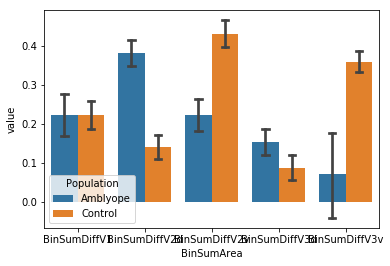

In [71]:
    ax = sns.barplot(x='BinSumArea', y='value', hue='Population', ci=68, capsize=.1, data=final_df)


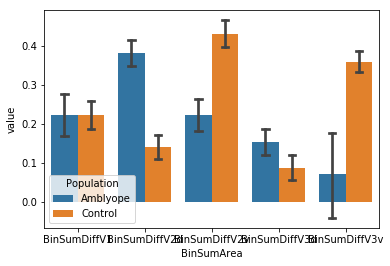

In [72]:
ax.figure

In [73]:
with s.PdfPages('plots/fmri_binsum_diffs.pdf') as pdf:
    ax = sns.barplot(x='BinSumArea', y='value', hue='Population', ci=68, capsize=.1, data=final_df)
    pdf.savefig(ax.figure)
    plt.close(ax.figure)
    plt.close('all')

In [74]:
gaba_group_df = final_df[(final_df['Orientation']=='Iso') & (final_df['BinSumArea']=='BinSumDiffV1') & (final_df['Presentation']=='nDicho')]

In [75]:
st.ttest_ind(gaba_group_df[gaba_group_df['Population']=='Amblyope']['GABA'].values,gaba_group_df[gaba_group_df['Population']=='Control']['GABA'].values)

Ttest_indResult(statistic=-0.31829417599087889, pvalue=0.75340558898575316)

In [76]:
with s.PdfPages('plots/gaba_diffs.pdf') as pdf:
    ax = sns.violinplot(y='GABA',x='Task',hue='Population',data=gaba_group_df,inner='stick',split=True,aspect=1)
    pdf.savefig(ax.figure)
    plt.close(ax.figure)
    plt.close('all')
#ax = sns.swarmplot(x='Population',y='GABA',hue='Population',data=gaba_group_df,ax=ax)

In [77]:
r_groups_pop['value'].sem()

Task  Orientation  Presentation  Population  BinSumArea   
OS    Cross        nDicho        Amblyope    BinSumDiffV1     0.117757
                                             BinSumDiffV2d    0.068118
                                             BinSumDiffV2v    0.086704
                                             BinSumDiffV3d    0.072187
                                             BinSumDiffV3v    0.217060
                                 Control     BinSumDiffV1     0.079802
                                             BinSumDiffV2d    0.072597
                                             BinSumDiffV2v    0.070898
                                             BinSumDiffV3d    0.071074
                                             BinSumDiffV3v    0.060004
                   nMono         Amblyope    BinSumDiffV1     0.117757
                                             BinSumDiffV2d    0.068118
                                             BinSumDiffV2v    0.086704
                  

In [84]:
pop_means = r_groups_pop.mean().reset_index()

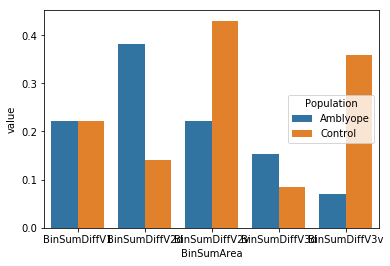

In [85]:
sns.barplot(x='BinSumArea', y='value', hue='Population', data=pop_means, ci=95)

In [86]:
r_groups_both = final_df.groupby(['Task', 'Orientation', 'Presentation', 'Population', 'BinSumArea'])

In [87]:
for rgv, rgr in r_groups_both:
    print(rgv)
    r_gaba_fmri = (rgr.corr()['GABA']['value'])
    r_gaba_thresh = (rgr.corr()['GABA']['Nde-De'])
    print('GABA and fMRI:', r_gaba_fmri, r_gaba_fmri**2)
    print('GABA and Nde-De:', r_gaba_thresh, r_gaba_thresh**2)
    #print(np.corrcoef(rgr['GABA'], rgr['value']))

('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV1')
GABA and fMRI: -0.148589918596 0.0220789639083
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV2d')
GABA and fMRI: -0.0917134754934 0.00841136158707
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV2v')
GABA and fMRI: 0.0984634406878 0.00969504915208
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV3d')
GABA and fMRI: -0.492541910101 0.242597533206
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Amblyope', 'BinSumDiffV3v')
GABA and fMRI: 0.358980819119 0.128867228496
GABA and Nde-De: 0.444582230924 0.197653360054
('OS', 'Cross', 'nDicho', 'Control', 'BinSumDiffV1')
GABA and fMRI: 0.548136864024 0.300454021702
GABA and Nde-De: 0.313299222137 0.0981564025919
('OS', 'Cross', 'nDicho', 'Control', 'BinSumDiffV2d')
GABA and fMRI: -0.0221762306571 0.000491785206158
GABA a

In [88]:
#graphs!

with s.PdfPages('plots/gaba_vs_fmri_joint.pdf') as pdf:
    plot_groups = final_df.groupby(['Task','Orientation'])
    for gv, gr in plot_groups:
        print(gv)
        xvar = "GABA"
        yvar = "value"
        x_lbl = "GABA (relative to creatine)"
        y_lbl = {'(Binocular - Dichoptic) BOLD amplitude (% signal)'}
        g = sns.lmplot(data=gr, row='BinSumArea',
                  col='Presentation',hue='Population',# facet rows and columns
                  x=xvar, y=yvar,sharey=False)
        g.fig.suptitle(gv, fontsize=16, y=0.99)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(x_lbl, y_lbl)
        pdf.savefig(g.fig)
        plt.close(g.fig)
    plt.close('all')

('OS', 'Cross')
('OS', 'Iso')


In [89]:
final_df.head()

,Task,Orientation,Population,Presentation,Subject,measure,Nde-De,GABA,BinSumArea,value
0,OS,Cross,Amblyope,nDicho,am,ThreshPredCriticalUnnorm,0.843896,0.193,BinSumDiffV1,0.078
1,OS,Cross,Amblyope,nDicho,bi,ThreshPredCriticalUnnorm,19.718420,0.207,BinSumDiffV1,0.129
2,OS,Cross,Amblyope,nDicho,gd,ThreshPredCriticalUnnorm,1.244359,0.203,BinSumDiffV1,-0.277
3,OS,Cross,Amblyope,nDicho,jv,ThreshPredCriticalUnnorm,3.737345,0.215,BinSumDiffV1,0.342
4,OS,Cross,Amblyope,nDicho,li,ThreshPredCriticalUnnorm,20.660788,0.227,BinSumDiffV1,-0.024


In [90]:
#graphs!

with s.PdfPages('plots/supp_vs_fmri.pdf') as pdf:
    plot_groups = final_df.groupby(['Task','Orientation'])
    for gv, gr in plot_groups:
        print(gv)
        xvar = "value"
        yvar = "Nde-De"
        x_lbl = "predicted Threshold Diff (C%, NDE-DE)"
        y_lbl = {'(Binocular - Dichoptic) BOLD amplitude (% signal)'}
        g = sns.lmplot(data=gr, row='BinSumArea',
                  col='Presentation',hue='Population',# facet rows and columns
                  x=xvar, y=yvar,sharey=False)
        g.fig.suptitle(gv, fontsize=16, y=0.99)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(x_lbl, y_lbl)
        pdf.savefig(g.fig)
        plt.close(g.fig)
    plt.close('all')

('OS', 'Cross')
('OS', 'Iso')


## Model the data again, this time log-transforming the ThreshElev (and not ignoring the facilitation data points)

In [ ]:
# initialize parameters
lm_params = s.lf.Parameters()
lm_params.add('y_int', value=1)
lm_params.add('slope', value=1)
lm_params.keys()

In [ ]:
# model each group's data using functions defined in suppression.py
preds_log = groups.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh, lm_params,
                     ret='preds', supp_only=False, log=True)

In [ ]:
preds_log.head(n=150)

In [ ]:
preds_log[(preds_log.Task=="SS") & (preds_log.Orientation=="Cross")]

In [ ]:
s.group_facet_plots(preds_log, s.fit_plot, 'plots/combined_loglinear_logaxes_withpred.pdf',
                  ['Task','Orientation'], #each combo of this gets its own page
                  row='Presentation',col='Trace',# facet rows and columns
                  x="RelMaskContrast", y="logThreshElev", # x, y
                  hue="Subject",yerr='ThreshElev_SE',fmt_obs='o',fmt_pred='.--',Ycol="ThreshPred") 

In [ ]:
# model each group's data using functions defined in suppression.py, return params
pfit_log = groups_with_baseline.apply(s.model_condition, s.linear_nofac_err, s.linear_nofac_thresh, lm_params, ret='weights', supp_only=False, log=True).reset_index()

In [ ]:
pfit_log

In [ ]:
# melt the result of the modeling into long format for plotting
m = pd.melt(pfit_log, id_vars=pp_gvars,var_name='measure')
m

In [ ]:
#Grab the GABA measure for each subject and it to each observation for easy plotting

comb = m.join(gdf.set_index(['subjName'])['GABA'], on=['Subject'])

In [ ]:
#graphs!
with s.PdfPages('plots/gaba_vs_measures_loglinear.pdf') as pdf:
    plot_groups = comb.groupby(['Task','Orientation','Eye'])
    for gv, gr in plot_groups:
        print(gv, np.all(np.isnan(gr['value'])))
        if gv[0]=='SS' and gv[1]=='Cross' and gv[2]=='De': continue
        xvar = "GABA"
        yvar = "value"
        g = sns.lmplot(data=gr, 
                  row='Presentation',col='measure',# facet rows and columns
                  x=xvar, y=yvar,hue="Population",sharey=False,ci=False)
        g.fig.suptitle(gv, fontsize=16, y=0.97)
        g.fig.subplots_adjust(top=.9, right=.8)
        g.set_axis_labels(xvar, yvar)
        pdf.savefig(g.fig)
    plt.close('all')